<a href="https://colab.research.google.com/github/Alina-Telnova/python-course/blob/master/5_nlp_libraries_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка
В этом воркбуке мы познакомимся с библиотеками для обработки естественного языка и отработаем цикл FOR.

**HuggingFace Datasets**

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

`pip install` - команда shell для загрузки библиотеки

`-q` - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

`!` - символ для объявления shell-команд

In [ ]:
!pip install -q datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.8 MB/s eta 0:00:00


Загрузим датасет для анализа тональности текстов

In [ ]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

train_df.csv:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

val_df.csv:   0%|          | 0.00/601k [00:00<?, ?B/s]

test_df.csv:   0%|          | 0.00/586k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31232 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5205 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5206 [00:00<?, ? examples/s]

Проведем анализ!

Структура объекта dataset довольно сложная, но удобная для интерпретации.

У нас есть 3 выборки: train, validation и test.

В каждой выборке 4 столбца:

- ID элемента датасета, он нужен, чтобы все значения были уникальными, как в реляционной БД
- text, label, sentiment

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

Обычно для обработки таких данных используется библиотека pandas, но пока мы учимся, будем использовать нативный метод - цикл FOR.

#**Задание 1**

Для начала проверим, сбалансирован ли наш датасет.

In [ ]:
# Какие метки есть в датасете? - id, text, label, sentiment

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [ ]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
# Подсказки:
# - создайте пустые переменные, куда вы будете вносить количество меток
# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
# - выведите на экран значения переменных для каждой из трех выборок

positive_counts_train = 0
negative_counts_train  = 0
neutral_counts_train = 0

for i in dataset['train']:
  if i['sentiment'] == 'negative':
    negative_counts_train += 1
  elif i['sentiment'] == 'positive':
    positive_counts_train += 1
  else:
    neutral_counts_train += 1
print(f"Данные обучающей выборки\n---\nПоложительные метки: {positive_counts_train} единиц\n"
f"Отрицательные метки: {negative_counts_train} единиц\n"
f'Нейтральные метки: {neutral_counts_train} единиц\n')

positive_counts_val = 0
negative_counts_val = 0
neutral_counts_val = 0

for i in dataset['validation']:
  if i['sentiment'] == 'negative':
    negative_counts_val += 1
  elif i['sentiment'] == 'positive':
    positive_counts_val += 1
  else:
    neutral_counts_val += 1
print(f"Данные проверочной выборки \n---\nПоложительные метки: {positive_counts_val} единиц\n"
f"Отрицательные метки: {negative_counts_val} единиц\n"
f'Нейтральные метки: {neutral_counts_val} единиц\n')

positive_counts_test = 0
negative_counts_test = 0
neutral_counts_test = 0

for i in dataset['test']:
  if i['sentiment'] == 'negative':
    negative_counts_test += 1
  elif i['sentiment'] == 'positive':
    positive_counts_test += 1
  else:
    neutral_counts_test += 1
print(f"Данные тестовой выборки\n---\nПоложительные метки: {positive_counts_test} единиц\n"
f"Отрицательные метки: {negative_counts_test} единиц\n"
f'Нейтральные метки: {neutral_counts_test} единиц')



Данные обучающей выборки
---
Положительные метки: 10478 единиц
Отрицательные метки: 9105 единиц
Нейтральные метки: 11649 единиц

Данные проверочной выборки 
---
Положительные метки: 1760 единиц
Отрицательные метки: 1517 единиц
Нейтральные метки: 1928 единиц

Данные тестовой выборки
---
Положительные метки: 1730 единиц
Отрицательные метки: 1546 единиц
Нейтральные метки: 1930 единиц


In [ ]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке


### ваш код здесь ###
total_train = positive_counts_train + negative_counts_train + neutral_counts_train
total_val = positive_counts_val + negative_counts_val + neutral_counts_val
total_test = positive_counts_test + negative_counts_test + neutral_counts_test

pos_tr = (positive_counts_train / total_train) * 100
neg_tr = (negative_counts_train / total_train) * 100
neut_tr = (neutral_counts_train / total_train) * 100

pos_val = (positive_counts_val / total_val) * 100
neg_val = (negative_counts_val / total_val) * 100
neut_val = (neutral_counts_val / total_val) * 100

pos_test = (positive_counts_test / total_test) * 100
neg_test = (negative_counts_test / total_test) * 100
neut_test = (neutral_counts_test / total_test) * 100

print(f'Данные обучающей выборки\n---\n'
      f'Положительные метки составляют {round(pos_tr)} % обучающей выборки\n'
      f'Отрицательные метки составляют {round(neg_tr)} % обучающей выборки\n'
      f'Нейтральные метки составляют {round(neut_tr)} % обучающей выборки\n\n'
      f'Данные проверочной выборки\n---\n'
      f'Положительные метки составляют {round(pos_val)} % обучающей выборки\n'
      f'Отрицательные метки составляют {round(neg_val)} % обучающей выборки\n'
      f'Нейтральные метки составляют {round(neut_val)} % обучающей выборки\n\n'
      f'Данные тестовой выборки\n---\n'
      f'Положительные метки составляют {round(pos_test)} % обучающей выборки\n'
      f'Отрицательные метки составляют {round(neg_test)} % обучающей выборки\n'
      f'Нейтральные метки составляют {round(neut_test)} % обучающей выборки\n')

Данные обучающей выборки
---
Положительные метки составляют 34 % обучающей выборки
Отрицательные метки составляют 29 % обучающей выборки
Нейтральные метки составляют 37 % обучающей выборки

Данные проверочной выборки
---
Положительные метки составляют 34 % обучающей выборки
Отрицательные метки составляют 29 % обучающей выборки
Нейтральные метки составляют 37 % обучающей выборки

Данные тестовой выборки
---
Положительные метки составляют 33 % обучающей выборки
Отрицательные метки составляют 30 % обучающей выборки
Нейтральные метки составляют 37 % обучающей выборки



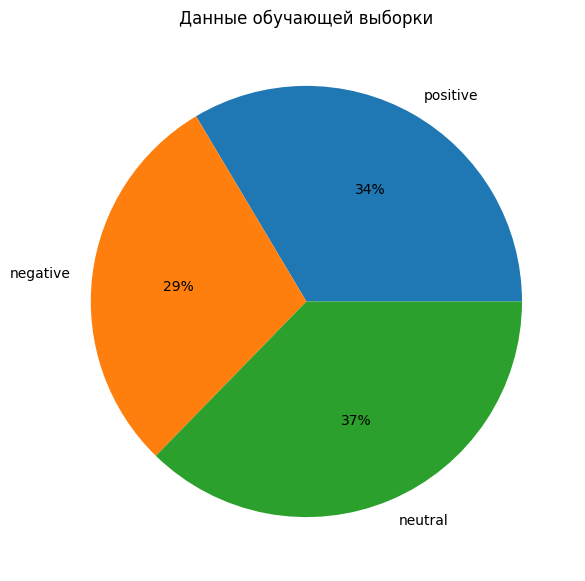

In [ ]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ['positive', 'negative', 'neutral']
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = [pos_tr, neg_tr, neut_tr]

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.title('Данные обучающей выборки')
plt.show()

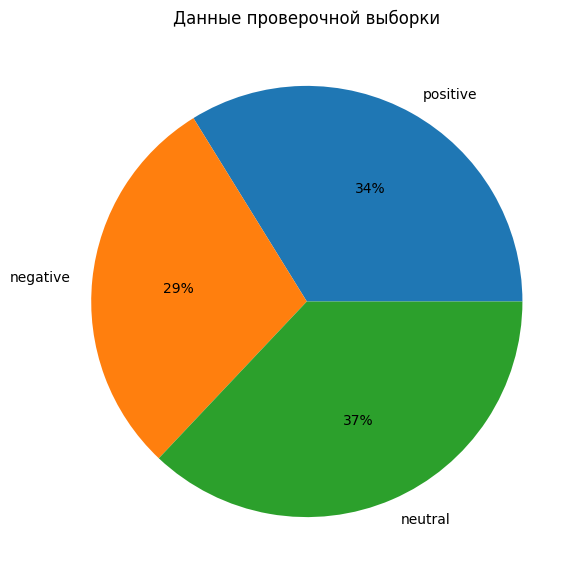

In [ ]:
# Сделаем то же самое для проверочной выборки
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ['positive', 'negative', 'neutral']
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = [pos_val, neg_val, neut_val]

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.title('Данные проверочной выборки')
plt.show()

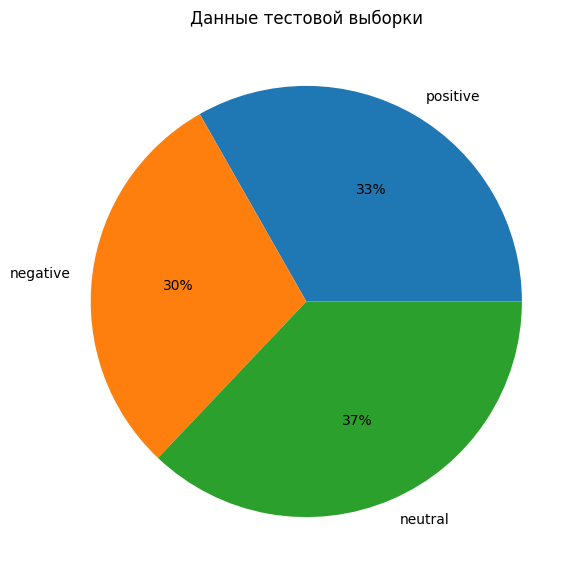

In [ ]:
# Сделаем то же самое для тестовой выборки
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ['positive', 'negative', 'neutral']
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = [pos_test, neg_test, neut_test]

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.title('Данные тестовой выборки')
plt.show()

#**Задание 2**

Займемся обработкой естественного языка.

Познакомимся с библиотекой SpaCy для обработки текстов.

In [98]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Токенизация SpaCy производится с помощью цикла for

In [99]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [100]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [101]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [102]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [103]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [104]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

NN
NN
NNS
,
JJ


In [105]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

compound
compound
ROOT
punct
amod


In [106]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


Задание!

1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [123]:
sample_1 = dataset['test'][:5]['text']
sample_1
# Выведите первые 5 текстов


['getting cds ready for tour',
 ' MC, happy mother`s day to your mom ;).. love yah',
 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?',
 ' because you had chips and sale w/o me',
 'Great for organising my work life balance']

2. Создадим список токенов для каждого текста с помощью SpaCy

In [125]:

tokens = [[token.text for token in nlp(text)] for text in sample_1] # Создаем список частей речи для каждого токена каждого текста
tokens

# Не забудьте применить nlp!
# Выведите первые 5 текстов
# Обработка может занять много времени, достаточно обработать первые 100 текстов

[['getting', 'cds', 'ready', 'for', 'tour'],
 [' ',
  'MC',
  ',',
  'happy',
  'mother`s',
  'day',
  'to',
  'your',
  'mom',
  ';)',
  '..',
  'love',
  'yah'],
 ['A',
  'year',
  'from',
  'now',
  'is',
  'graduation',
  '....',
  'i',
  'am',
  'pretty',
  'sure',
  'i`m',
  'not',
  'ready',
  'for',
  'it',
  '!',
  '?',
  '!',
  '?',
  '!',
  '?'],
 [' ', 'because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me'],
 ['Great', 'for', 'organising', 'my', 'work', 'life', 'balance']]

3. Частеречная разметка: создаем список частей речи для каждого токена

In [129]:
pos_tag = [[token.pos_ for token in nlp(text)] for text in sample_1]
print(pos_tag)

[['VERB', 'NOUN', 'ADJ', 'ADP', 'NOUN'], ['SPACE', 'PROPN', 'PUNCT', 'ADJ', 'PROPN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT', 'PUNCT', 'NOUN', 'NOUN'], ['DET', 'NOUN', 'ADP', 'ADV', 'AUX', 'NOUN', 'PUNCT', 'PRON', 'AUX', 'ADV', 'ADJ', 'PROPN', 'PART', 'ADJ', 'ADP', 'PRON', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT', 'PUNCT'], ['SPACE', 'SCONJ', 'PRON', 'VERB', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON'], ['ADJ', 'ADP', 'VERB', 'PRON', 'NOUN', 'NOUN', 'NOUN']]


4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [132]:
# Это задание сложнее, чем кажется
# Подсказка:
# for i in range(len(list)) - это итерация по _длине_ списка;
# в переменную i сохраняется порядковый номер текущего элемента списка;
# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

for i in range(len(sample_1)): #итерация по длине списка
    print(f"\nТекст {i}") # номер текста
    doc = nlp(sample_1[i])
    for token in doc: # прошли по каждому токену из текста
        print(f"{token.text}  {token.pos_}") # token.text = токен, а token.pos = часть речи


Текст 0
getting  VERB
cds  NOUN
ready  ADJ
for  ADP
tour  NOUN

Текст 1
   SPACE
MC  PROPN
,  PUNCT
happy  ADJ
mother`s  PROPN
day  NOUN
to  ADP
your  PRON
mom  NOUN
;)  PUNCT
..  PUNCT
love  NOUN
yah  NOUN

Текст 2
A  DET
year  NOUN
from  ADP
now  ADV
is  AUX
graduation  NOUN
....  PUNCT
i  PRON
am  AUX
pretty  ADV
sure  ADJ
i`m  PROPN
not  PART
ready  ADJ
for  ADP
it  PRON
!  PUNCT
?  PUNCT
!  PUNCT
?  PUNCT
!  PUNCT
?  PUNCT

Текст 3
   SPACE
because  SCONJ
you  PRON
had  VERB
chips  NOUN
and  CCONJ
sale  NOUN
w/o  ADP
me  PRON

Текст 4
Great  ADJ
for  ADP
organising  VERB
my  PRON
work  NOUN
life  NOUN
balance  NOUN


5. Разметка именованных сущностей

Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.

In [136]:
sample_texts = dataset['test'][7:20]['text']  # Берем тексты с 7 по 19


for text in sample_texts:# Для каждого текста из выбранного среза
    doc = nlp(text)  # Применяем nlp для разметки именованных сущностей
    print([(ent.text, ent.label_) for ent in doc.ents])  # Выводим сущность и ее лейбл

[('1st', 'ORDINAL'), ('2890', 'CARDINAL')]
[('first', 'ORDINAL')]
[('today', 'DATE'), ('i`m', 'NORP')]
[]
[('Audi', 'ORG')]
[]
[('REALLY', 'GPE')]
[('i`m', 'NORP')]
[]
[]
[('TY', 'ORG')]
[('recent years', 'DATE')]
[]


Здесь мы используем новый тип данных - кортеж `(entity, label)`

Кортеж очень похож на список. Разница только в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.

Кортежи занимают меньше памяти, т.к. у них меньше свойств. Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря `dict`.

На практике, их удобно применять для разметки данных  методами NLP.

In [150]:
from spacy import displacy

sample_text = dataset['test'][20]['text']

# Визуализируем разметку именованных сущностей
displacy.render(nlp(sample_text), style="ent", jupyter=True)